# Türkiye'de Ocak 2008 ve Ağustos 2020 Arasındaki Kadın Cinayetleri

<font color = "blue">
İçerik:

1. [Verinin Yüklenmesi ve Kontrol Edilmesi](#1)
2. [Veri Tanımlaması](#2)
3. [Sayısal Değerlerin Belirlenmesi](#3)
4. [Sorgular ve Verilerin Görselleştirilmesi](#4)
    * [Ocak 2008 ve Ağustos 2020 Tarihleri Arasında Ölen Kadınlar Histogram Grafiği](#5)
    * [Öldürülme Şekli Pie Chart Grafiği](#6)
    * [Koruma Kararı Pie Chart Grafiği](#7)
    * [Katillerin Durumu Pie Chart Grafiği](#8)
    * [Kim Tarafından Öldürüldüğü Bar Plot Grafiği](#9)
        * [1. Dereceden Kan Bağı Olanlar Tarafından](#10)
        * [Duygusal İlişki Kurulan İnsanlar Tarafından](#11)
    * [Bölgelere Göre Pie Chart Grafiği](#12)
    * [Sehirlere Göre Pie Chart Grafiği](#13)
    * [Öldürülme Sebeplerine Göre Pie Chart Grafiği](#14) 
5. [Kaynaklar](#15)
6. [Teammate](#16)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/woman-murdering-in-turkey-20082020/women_who_have_been_murdered_in_turkey.csv


<a id = "1"></a>
## Verinin Yüklenmesi ve Kontrol Edilmesi

In [2]:
data = pd.read_csv('/kaggle/input/woman-murdering-in-turkey-20082020/women_who_have_been_murdered_in_turkey.csv')
data.head() 

,id,city,age,date,protectionorder,why1,why2,killer1,killer2,killingway1,killingway2,killingway3,statusofkiller,year
0,1,Adana,Resit,01/02/2008,Tespit Edilemeyen,Erkegin istedigi bir seyin gerceklesmemesi seb...,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,NaN,2008.0
1,2,Adana,NaN,01/12/2008,Yok,Tespit Edilemeyen,NaN,Sevgilisi,NaN,Atesli Silah,NaN,NaN,Intihar,2008.0
2,3,Adana,Resit Degil,01/02/2008,Yok,Tespit Edilemeyen,NaN,Babasi,NaN,Darp,NaN,NaN,Tutuklu,2008.0
3,4,Adana,NaN,01/04/2008,Yok,Tespit Edilemeyen,NaN,Eski Sevgilisi,NaN,Atesli Silah,NaN,NaN,Intihar,2008.0
4,5,Ankara,NaN,01/12/2008,Tespit Edilemeyen,Tespit Edilemeyen,NaN,Tespit Edilemeyen,NaN,Tespit Edilemeyen,NaN,NaN,Tespit Edilemeyen,2008.0


In [3]:
data = data.replace({"^\s*|\s*$":""}, regex=True) #verilerimizdeki boslukları yok edebilmek için
year = data['year'] = data['year'].astype('int') #yearımızın degeri float olarak görünüyor o yüzden int e çevirdik
data['city'] = data['city'].astype('str')


In [4]:
data.columns

Index(['id', 'city', 'age', 'date', 'protectionorder', 'why1', 'why2',
       'killer1', 'killer2', 'killingway1', 'killingway2', 'killingway3',
       'statusofkiller', 'year'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               3111 non-null   int64 
 1   city             3111 non-null   object
 2   age              1320 non-null   object
 3   date             3111 non-null   object
 4   protectionorder  3109 non-null   object
 5   why1             3110 non-null   object
 6   why2             70 non-null     object
 7   killer1          3107 non-null   object
 8   killer2          14 non-null     object
 9   killingway1      3111 non-null   object
 10  killingway2      70 non-null     object
 11  killingway3      6 non-null      object
 12  statusofkiller   1767 non-null   object
 13  year             3111 non-null   int64 
dtypes: int64(2), object(12)
memory usage: 340.4+ KB


In [6]:
data.tail()

,id,city,age,date,protectionorder,why1,why2,killer1,killer2,killingway1,killingway2,killingway3,statusofkiller,year
3106,3111,Van,Resit,19/01/2013,Yok,Tespit Edilemeyen,NaN,Kocasi,NaN,Bogulma,NaN,NaN,Tutuklu,2013
3107,3112,Istanbul,Resit,22/01/2013,Var,Tespit Edilemeyen,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,NaN,2013
3108,3113,Kars,Resit,23/01/2013,Yok,Kiskanclik,NaN,Eski Kocasi,NaN,Atesli Silah,NaN,NaN,NaN,2013
3109,3114,Samsun,Resit,26/02/2013,Yok,Tespit Edilemeyen,NaN,Eski Sevgilisi,NaN,Atesli Silah,NaN,NaN,Tutuklu,2013
3110,3115,Hatay,Resit,02/03/2013,Yok,Tespit Edilemeyen,NaN,Eski Kocasi,NaN,Atesli Silah,NaN,NaN,Tespit Edilemeyen,2013


In [7]:
data


,id,city,age,date,protectionorder,why1,why2,killer1,killer2,killingway1,killingway2,killingway3,statusofkiller,year
0,1,Adana,Resit,01/02/2008,Tespit Edilemeyen,Erkegin istedigi bir seyin gerceklesmemesi seb...,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,NaN,2008
1,2,Adana,NaN,01/12/2008,Yok,Tespit Edilemeyen,NaN,Sevgilisi,NaN,Atesli Silah,NaN,NaN,Intihar,2008
2,3,Adana,Resit Degil,01/02/2008,Yok,Tespit Edilemeyen,NaN,Babasi,NaN,Darp,NaN,NaN,Tutuklu,2008
3,4,Adana,NaN,01/04/2008,Yok,Tespit Edilemeyen,NaN,Eski Sevgilisi,NaN,Atesli Silah,NaN,NaN,Intihar,2008
4,5,Ankara,NaN,01/12/2008,Tespit Edilemeyen,Tespit Edilemeyen,NaN,Tespit Edilemeyen,NaN,Tespit Edilemeyen,NaN,NaN,Tespit Edilemeyen,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,3111,Van,Resit,19/01/2013,Yok,Tespit Edilemeyen,NaN,Kocasi,NaN,Bogulma,NaN,NaN,Tutuklu,2013
3107,3112,Istanbul,Resit,22/01/2013,Var,Tespit Edilemeyen,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,NaN,2013
3108,3113,Kars,Resit,23/01/2013,Yok,Kiskanclik,NaN,Eski Kocasi,NaN,Atesli Silah,NaN,NaN,NaN,2013
3109,3114,Samsun,Resit,26/02/2013,Yok,Tespit Edilemeyen,NaN,Eski Sevgilisi,NaN,Atesli Silah,NaN,NaN,Tutuklu,2013


<a id = '2'></a> 
## **Verilerin Tanımlanması**

<font color = "red">AÇIKLAMA:</font>
<font color = "blue">Veriler internetteki haber sitelerinden alınmış olup, yüzde yüz doğruluk payı içerememektedir. Bazı veriler ne yazık ki eksik olup daha sonrasında kamuoyuna bildirilmediği için ulaşılamamaktadır. Veriseti Yağmur Sezen Demir ve Büşra Durak tarafından internetteki verilerin Selenium aracılığı ile Excel'e çekilmesi ile oluşturulmuştur.</font>

- **id: Tanımlayıcı**
- **city: Hangi Şehirde Öldürüldüğü**
- **age: Reşit / Reşit Değil**
- **date: Hangi Tarihte Gerçekleştiği**
- **protectionorder: Koruma Kararı**
- **why1, why2: Öldürülme Sebebi**
- **killer1, killer2: Kim Tarafından Öldürüldüğü**
- **killingway1, killingway2, killingway3: Maktülün Öldürülme Şekli**
- **statusofkiller: Katilin Durumu**
- **year: Hangi Yılda Gerçekleştiği**


<a id = '3'> </a>
## Sayısal Değerlerin Belirlenmesi

In [8]:
yillaragoreolum = data.year.value_counts().head(13).sort_index()
yillaragoreolum

2008     65
2009    123
2010    194
2011    121
2012    139
2013    229
2014    290
2015    295
2016    282
2017    348
2018    403
2019    427
2020    194
Name: year, dtype: int64

<font color = "#000045"><b> Yukarıdaki verilerde hangi yılda kaç kadın öldürüldüğü görülmektedir. 2020'nin ilk 8 ayında toplamda 194 kadın öldürülmüştür. </b>


In [9]:
kimtarafindan = data.killer1.value_counts()
kimtarafindan.head(15)

Kocasi               1032
Tespit Edilemeyen     499
Sevgilisi             305
Tanidigi Birisi       270
Eski Kocasi           179
Oglu                  113
Babasi                107
Tanimadigi Birisi      89
Eski Sevgilisi         82
Akrabasi               78
Damadi                 58
Abisi                  41
Erkek Kardesi          34
Ailesi                 18
Enistesi               15
Name: killer1, dtype: int64

 <font color = "#000045"><b> Yukarıdaki verilerde 2008-2020 yılları arasında maktüllerin kim tarafından öldürüldüğü görülmektedir. Belirlenemeyen veriler haricinde, toplamda 1032 kadın kocası tarafından öldürülmüştür. </b>

In [10]:
data.statusofkiller.value_counts().head(7)

Tutuklu               982
Tespit Edilemeyen     293
Intihar               235
Sorusturma Suruyor    121
Araniyor               88
Kacak                  37
Yargilaniyor            6
Name: statusofkiller, dtype: int64

<font color = "#000045"><b> Yukarıdaki verilerde katillerin durumu görülmektedir. </b>

 <a id='4'></a>
## Sorgular ve Verilerin Görselleştirilmesi 

In [11]:
data[
    ((data.killer1 == 'Kocasi') | (data.killer2 == 'Kocasi')) &
    ((data.killingway1 == 'Atesli Silah') | (data.killingway2 == 'Atesli Silah')|(data.killingway3 == 'Atesli Silah'))
]

,id,city,age,date,protectionorder,why1,why2,killer1,killer2,killingway1,killingway2,killingway3,statusofkiller,year
0,1,Adana,Resit,01/02/2008,Tespit Edilemeyen,Erkegin istedigi bir seyin gerceklesmemesi seb...,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,NaN,2008
10,11,Bingol,Resit,04/03/2008,Yok,Tartisma,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,Tutuklu,2008
18,19,Gaziantep,Resit,07/05/2008,Yok,Tespit Edilemeyen,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,Tespit Edilemeyen,2008
27,28,Istanbul,Resit,10/07/2008,Yok,Tartisma,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,Intihar,2008
31,32,Sinop,NaN,17/05/2008,Yok,Tespit Edilemeyen,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,Tutuklu,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,3097,Istanbul,Resit,06/12/2012,Yok,Tartisma,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,NaN,2012
3095,3100,Tespit Edilemeyen,Resit,31/12/2012,Yok,Aldatilma Suphesi,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,NaN,2012
3098,3103,Kayseri,Resit,18/12/2012,Yok,Tartisma,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,NaN,2012
3099,3104,Diyarbakir,Resit,31/12/2012,Yok,Tespit Edilemeyen,NaN,Kocasi,NaN,Atesli Silah,NaN,NaN,NaN,2012


<font color = "#000045"> <b> Yukarıda yazılan sorguda kocası tarafından 2008-2020 tarihleri arasında ateşli silahla öldürülenler listelenmiştir. </b>

<a id = "5"></a>
<font color = "#800000">
### **Ocak 2008 ve Ağustos 2020 Tarihleri Arasında Ölen Kadınlar Histogram Grafiği**


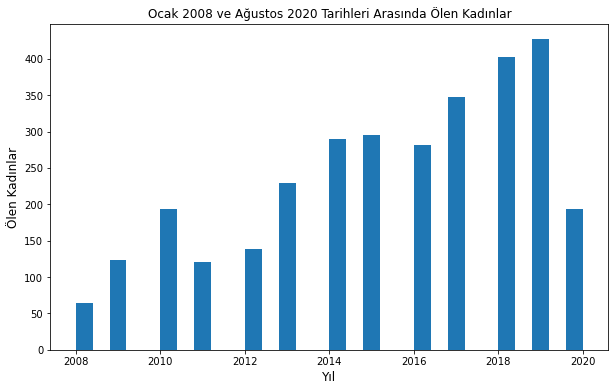

In [12]:
yillaragoreolenkadinlar =data.year.plot(kind = 'hist' , bins = 30 , figsize = (10,6) , range = (2008 , 2020) , label = 'Yil' )
yillaragoreolenkadinlar.set_title("Ocak 2008 ve Ağustos 2020 Tarihleri Arasında Ölen Kadınlar" , fontsize = 12)
yillaragoreolenkadinlar.set_xlabel("Yıl", fontsize = 12)
yillaragoreolenkadinlar.set_ylabel("Ölen Kadınlar", fontsize = 12)
plt.show()

<a id = "6"></a>
<font color = "#800000">
### **Öldürülme Şekli Pie Chart Grafiği**

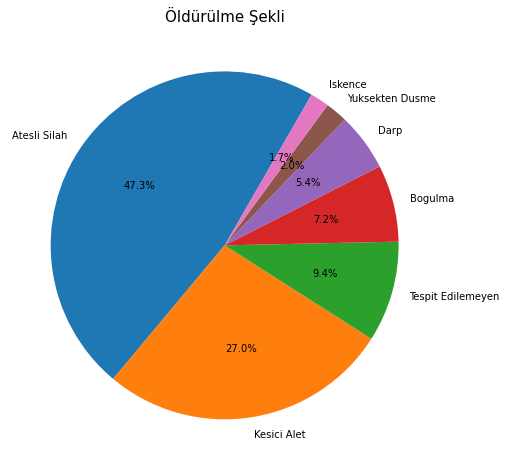

In [13]:
degerler = data.killingway1.value_counts().head(7)
nasiloldurulduler = degerler.plot(kind='pie'  , figsize = (9, 8) , startangle = 60 , shadow = False , autopct = "%1.1f%%")
nasiloldurulduler.set_title("Öldürülme Şekli" , fontsize = 15)
nasiloldurulduler.set_ylabel("" , fontsize = 15)
plt.show()

<font color = '#000045'> <b> Verilerde ilk 7 öldürme aracına bakıldığında neredeyse yarısının ateşli silah olduğu görülmektedir. </b> </font>

<a id = "7"></a>
<font color = "#800000">
### **Koruma Kararı Pie Chart Grafiği**


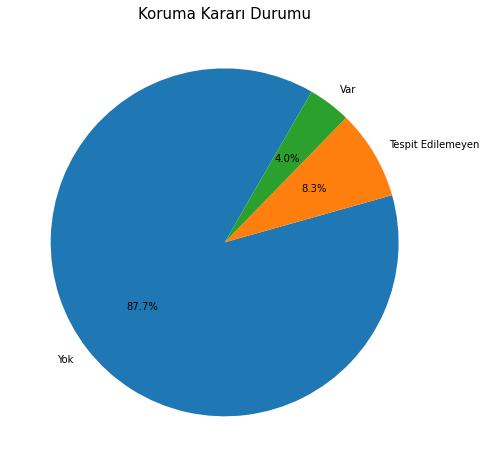

In [14]:
degerler2 = data.protectionorder.value_counts().head(3)
korumakarari = degerler2.plot(kind='pie'  , figsize = (9, 8) , startangle = 60 , shadow = False , autopct = "%1.1f%%")
korumakarari.set_title("Koruma Kararı Durumu" , fontsize = 15)
korumakarari.set_ylabel("" , fontsize = 15)
plt.show()

<a id = "8"></a>
<font color = "#800000">
### **Katillerin Durumu Pie Chart Grafiği**


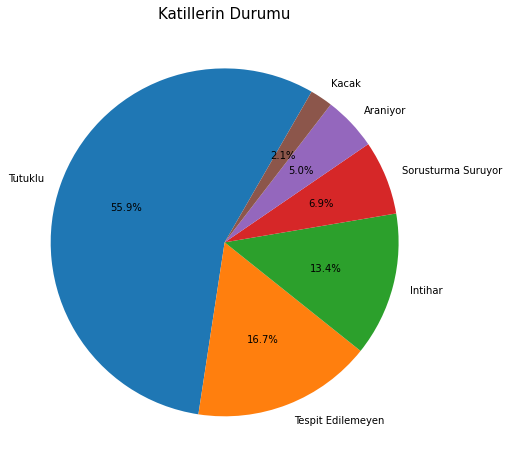

In [15]:
degerler3 = data.statusofkiller.value_counts().head(6)
katildurumu = degerler3.plot(kind='pie'  , figsize = (9, 8) , startangle = 60 , shadow = False , autopct = "%1.1f%%")
katildurumu.set_title("Katillerin Durumu" , fontsize = 15)
katildurumu.set_ylabel("" , fontsize = 15)
plt.show()

<a id = "9"></a>
<font color = "#800000">
### **Kim Tarafından Öldürüldüğü Bar Plot Grafiği**

<a id = "10"></a>
### **1. Dereceden Kan Bağı Olanlar Tarafından**

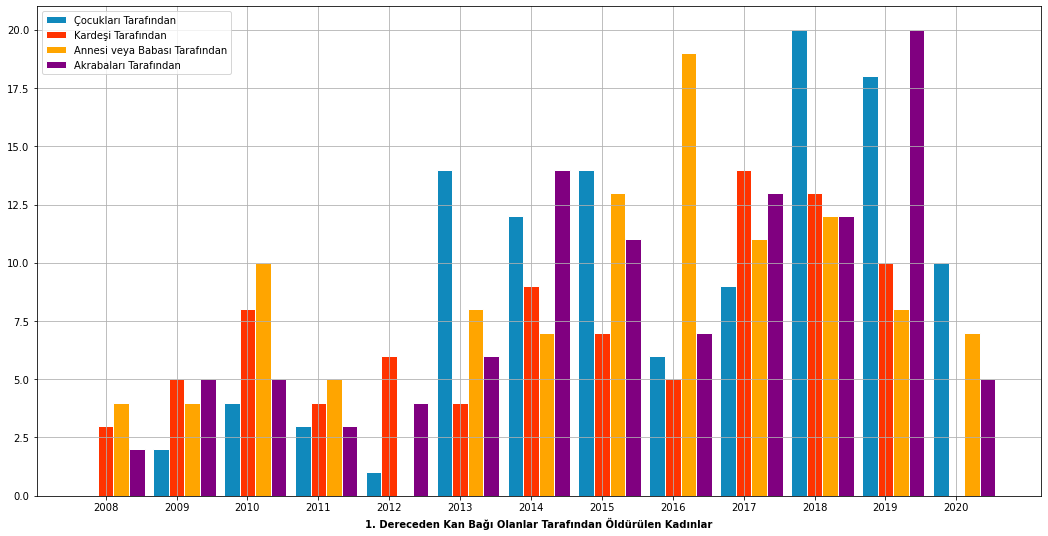

In [16]:
# Kızı ve Oğlu Tarafından
ailesi1 = data[(data['killer1'] == 'Oglu') | (data['killer1'] == 'Kizi')]
ailesi1filtre = ailesi1[['year','killer1']]
ailesi1filtre.year.value_counts().head(13).sort_index()
listeailesi1 = list(ailesi1filtre.year.value_counts().head(13).sort_index())
listeailesi1.insert(0,0) #Bazı yıllarda veri yok bu yüzden o yıllara 0 ekledik
#Abisi , Kardesi , Erkek Kardesi Tarafından
ailesi2 = data[(data['killer1'] == 'Abisi') | (data['killer1'] == 'Kardesi') | (data['killer1'] == 'Erkek Kardesi') ]
ailesi2filtre = ailesi2[['year','killer1']]
ailesi2filtre.year.value_counts().head(13).sort_index()
listeailesi2 = list(ailesi2filtre.year.value_counts().head(13).sort_index())
listeailesi2.append(0)
# Annesi Babası Tarafından
ailesi3 = data[(data['killer1'] == 'Babasi') | (data['killer1'] == 'Annesi') ]
ailesi3filtre = ailesi3[['year','killer1']]
ailesi3filtre.year.value_counts().head(13).sort_index()
listeailesi3 = list(ailesi3filtre.year.value_counts().head(13).sort_index())
listeailesi3.insert(4,0)
#Torunu Tarafından
ailesi4 = data[(data['killer1'] == 'Torunu' ) | (data['killer1'] == 'Yegeni') | (data['killer1'] == 'Amcasi') | (data['killer1'] == 'Dayisi')|(data['killer1'] == 'Kuzeni') | (data['killer1'] == 'Akrabasi')]
ailesi4filtre = ailesi4[['year','killer1']]
ailesi4filtre.year.value_counts().head(13).sort_index()
listeailesi4 = list(ailesi4filtre.year.value_counts().head(13).sort_index())
#Verimizi Listeye Alalım
datamiz1 = []
datamiz1.append(listeailesi1)
datamiz1.append(listeailesi2)
datamiz1.append(listeailesi3)
datamiz1.append(listeailesi4) 
# X axisindeki değerleri atayalım
barWidth = 0.22
r1 = np.arange(len(datamiz1[0]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#plotu oluşturalım ve görüntüleyelim
plt.figure(figsize=(18,9))
plt.grid(zorder = 0)
plt.bar(r1, datamiz1[0], color='#1089bc', width=barWidth, edgecolor='white', label='Çocukları Tarafından')
plt.bar(r2, datamiz1[1] , color='#ff3300', width=barWidth, edgecolor='white', label='Kardeşi Tarafından')
plt.bar(r3, datamiz1[2], color='#ffa500', width=barWidth, edgecolor='white', label='Annesi veya Babası Tarafından')
plt.bar(r4, datamiz1[3], color='purple', width=barWidth, edgecolor='white', label='Akrabaları Tarafından')
plt.xlabel('1. Dereceden Kan Bağı Olanlar Tarafından Öldürülen Kadınlar', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(datamiz1[0]))], ['2008', '2009', '2010', '2011', '2012','2013', '2014', '2015', '2016', '2017','2018', '2019', '2020'])
plt.legend()
plt.show()


<a id = "11"></a>
### **Duygusal İlişki Kurulan İnsanlar Tarafından**


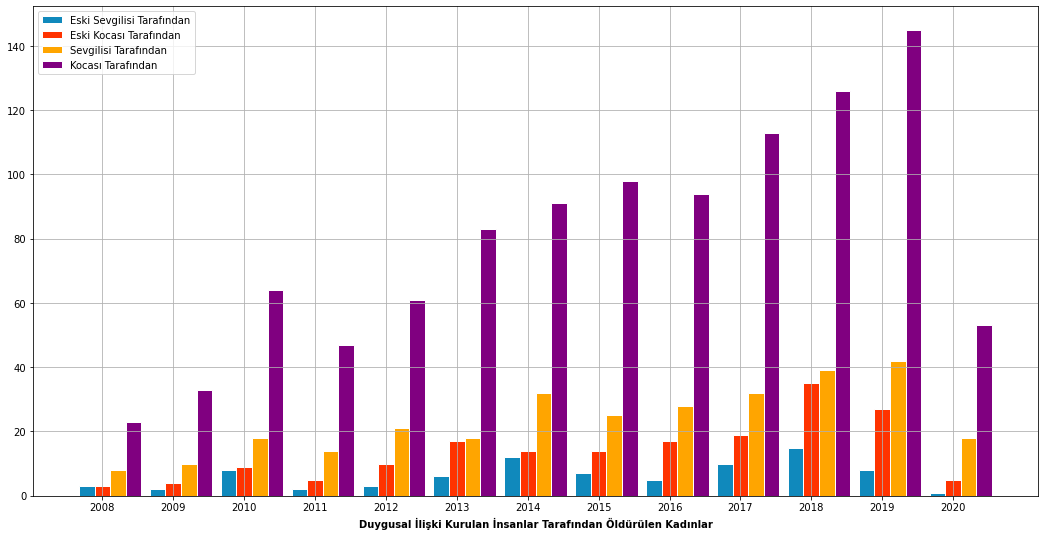

In [17]:
# Kocası Tarafından Öldürülenler
kocasitarafindan = data[data['killer1'] == 'Kocasi' ]
kocasitarafindanfiltre = kocasitarafindan[['year','killer1']]
kocasitarafindanfiltre.year.value_counts().head(13).sort_index()
listekocasi = list(kocasitarafindanfiltre.year.value_counts().head(13).sort_index())
#Eski Kocası Tarafından Öldürülenler
eskikocasitarafindan = data[data['killer1'] == 'Eski Kocasi' ]
eskikocasitarafindanfiltre = eskikocasitarafindan[['year','killer1']]
eskikocasitarafindanfiltre.year.value_counts().head(13).sort_index()
listeeskikocasi = list(eskikocasitarafindanfiltre.year.value_counts().head(13).sort_index())
#Eski Sevgilisi Tarafından Öldürülenler
eskisevgilisitarafindan = data[(data['killer1'] == 'Eski Sevgilisi') ]
eskisevgilisitarafindanfiltre = eskisevgilisitarafindan[['year','killer1']]
eskisevgilisitarafindanfiltre.year.value_counts().head(13).sort_index()        
listeeskisevgilisi = list(eskisevgilisitarafindanfiltre.year.value_counts().head(13).sort_index())
#Sevgilisi Tarafından Öldürülenler
sevgilisitarafindan = data[data['killer1'] == 'Sevgilisi' ]
sevgilisitarafindanfiltre = sevgilisitarafindan[['year','killer1']]
sevgilisitarafindanfiltre.year.value_counts().head(13).sort_index()
listesevgilisi = list(sevgilisitarafindanfiltre.year.value_counts().head(13).sort_index())
#Verimizi Listeye Alalım
datamiz = []
datamiz.append(listeeskisevgilisi)
datamiz.append(listeeskikocasi)
datamiz.append(listesevgilisi)
datamiz.append(listekocasi)
# X axisindeki değerleri atayalım
barWidth = 0.22
r1 = np.arange(len(datamiz[0]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
#plotu oluşturalım ve görüntüleyelim
plt.figure(figsize=(18,9))
plt.grid(zorder = 0)
plt.bar(r1, datamiz[0], color='#1089bc', width=barWidth, edgecolor='white', label='Eski Sevgilisi Tarafından')
plt.bar(r2, datamiz[1] , color='#ff3300', width=barWidth, edgecolor='white', label='Eski Kocası Tarafından')
plt.bar(r3, datamiz[2], color='#ffa500', width=barWidth, edgecolor='white', label='Sevgilisi Tarafından')
plt.bar(r4, datamiz[3], color='purple', width=barWidth, edgecolor='white', label='Kocası Tarafından')
plt.xlabel('Duygusal İlişki Kurulan İnsanlar Tarafından Öldürülen Kadınlar', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(datamiz[0]))], ['2008', '2009', '2010', '2011', '2012','2013', '2014', '2015', '2016', '2017','2018', '2019', '2020'])
plt.legend()
plt.show()


<a id = "12"></a>
<font color = "#800000">
## **Bölgelere Göre Pie Chart Grafiği**


In [18]:
Bolgeler= pd.DataFrame({'AkdenizBolgesi': ['Adana', 'Antalya', 'Mersin' , 'Burdur' , 'Hatay' , 'Isparta' , 'Kahramanmaras' , 'Osmaniye', '','','','','','','','','',''], 
              'EgeBolgesi': ['Izmir', 'Mugla' , 'Aydin' , 'Afyonkarahisar' , 'Denizli', 'Kutahya' , 'Manisa', 'Usak','','','','','','','','','',''], 
              'MarmaraBolgesi' : ['Balikesir', 'Bilecik' , 'Bursa' , 'Canakkale', 'Edirne', 'Istanbul', 'Kirklareli', 'Kocaeli' , 'Izmit', 'Sakarya', 'Tekirdağ' ,'Yalova','','','','','',''],
              'DoguAnadoluBolgesi' : ['Agri', 'Ardahan', 'Bingol', 'Bitlis', 'Elazig', 'Erzincan' , 'Erzurum', 'Hakkari', 'Igdir', 'Kars', 'Malatya','Mus', 'Tunceli', 'Van','','','',''] ,
              'IcAnadoluBolgesi': ['Aksaray', 'Ankara', 'Cankiri', 'Eskisehir', 'Karaman', 'Kayseri', 'Kirikkale', 'Kirsehir', 'Konya', 'Nevsehir', 'Nigde', 'Sivas','Yozgat','','','','',''],
              'GuneydoguAnadoluBolgesi' : ['Adiyaman', 'Batman', 'Diyarbakir', 'Gaziantep', 'Mardin', 'Siirt', 'Sanliurfa', 'Urfa', 'Sirnak', 'Kilis','','','','','','','',''],
              'KaradenizBolgesi' : ['Trabzon' , 'Amasya', 'Artvin', 'Bartın' , 'Bayburt', 'Bolu', 'Corum', 'Duzce', 'Giresun', 'Gumushane', 'Karabuk', 'Kastamonu', 'Ordu', 'Rize', 'Samsun', 'Sinop', 'Tokat', 'Zonguldak'] })
akdenizcount = 0 
egecount = 0
marmaracount = 0
doguanadolucount=0 
icanadolucount = 0
guneydogucount=0
karadenizcount =0
nancount= 0
for i in range (0,2972):
    for j in range (0, 18):
    #if data.city == deneme.AkdenizBolgesi[i]:
        #count = count + 
        x = np.where((data.city[i] == Bolgeler.AkdenizBolgesi[j]), 1 ,0)
        if x :
            akdenizcount = akdenizcount +1
            break
        else :
            y = np.where((data.city[i] == Bolgeler.EgeBolgesi[j]), 1 , 0)
            if y : 
                egecount= egecount +1
                break
            else : 
                z = np.where((data.city[i] == Bolgeler.MarmaraBolgesi[j]), 1 ,0)
                if z : 
                    marmaracount= marmaracount +1
                    break
                else:
                    t = np.where((data.city[i] == Bolgeler.DoguAnadoluBolgesi[j]), 1 , 0)
                    if t :
                        doguanadolucount = doguanadolucount +1
                        break
                    else :    
                        w = np.where((data.city[i] == Bolgeler.IcAnadoluBolgesi[j]), 1 ,0)
                        if w : 
                            icanadolucount = icanadolucount + 1 
                            break
                        else:
                            r = np.where((data.city[i] == Bolgeler.GuneydoguAnadoluBolgesi[j]), 1 , 0)
                            if r :
                                guneydogucount = guneydogucount + 1 
                                break
                            else: 
                                v = np.where((data.city[i] == Bolgeler.KaradenizBolgesi[j]), 1 , 0)
                                if v: 
                                    karadenizcount = karadenizcount +1
                                    break
                                else:
                                    if( j == 17):
                                        nancount = nancount +1
bolgeyegoreliste = [akdenizcount,egecount,marmaracount,icanadolucount,doguanadolucount,guneydogucount,karadenizcount,nancount]
bolgeyegoreliste.sort()
bolgeyegoreliste = bolgeyegoreliste[::-1]
bolgeyegoreliste

[1220, 482, 282, 280, 250, 179, 169, 110]

In [19]:
data.city.value_counts().head(10)

nan          1180
Istanbul      296
Izmir         122
Antalya        91
Ankara         85
Bursa          83
Adana          79
Konya          62
Gaziantep      57
Mersin         54
Name: city, dtype: int64

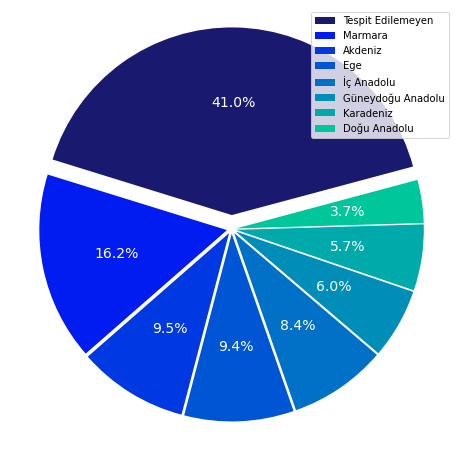

In [20]:
counts = pd.Series([1220, 482, 282, 280, 250, 179, 169, 110],index = ['','','','','','','',''] )

explode = (0.075, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,0.025)
colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80','#00FF80' ,]
index1 = ['Tespit Edilemeyen','Marmara','Akdeniz','Ege','İç Anadolu','Güneydoğu Anadolu','Karadeniz','Doğu Anadolu']
counts.plot(kind='pie', fontsize=14, colors=colors, explode=explode,figsize = (8,8), autopct = "%1.1f%%" ,startangle = 15 ,textprops = dict(color = 'w'))
plt.axis('equal')
plt.ylabel('')
plt.legend(labels=index1, loc="upper right")
plt.show()

<a id = "13"></a>
<font color = "#800000">
## **Şehirlere Göre Pie Chart Grafiği**


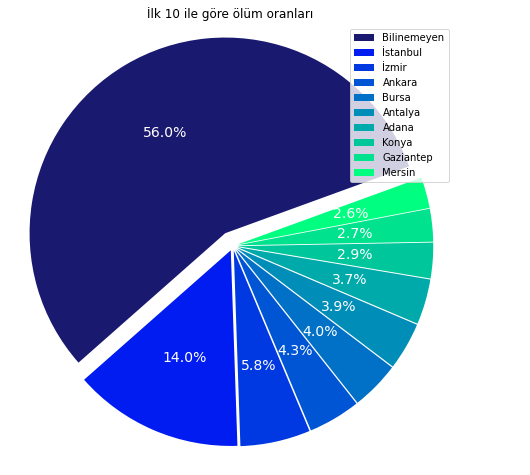

In [21]:
degerler3 = data.city.value_counts().head(10)
colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80','#00FF80' ,]
explode = (0.075, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,0.025, 0.025,0.025)
sehirler = degerler3.plot(kind='pie'  , textprops = dict(color = 'w'),figsize = (8, 8),colors = colors ,explode = explode, startangle = 20 , shadow = False , autopct = "%1.1f%%", fontsize=14)
sehirler.set_title("İlk 10 ile göre ölüm oranları")
sehirler.set_ylabel("" )
indexsehirler = ['Bilinemeyen','İstanbul','İzmir','Ankara','Bursa','Antalya','Adana','Konya','Gaziantep' , 'Mersin' ]
plt.axis('equal')
plt.legend(labels = indexsehirler , loc = 'upper right' , fontsize = 10)
plt.ylabel('')
plt.show()

<a id = "14"></a>
<font color = "#800000">
## **Öldürülme Sebeplerine Göre Pie Chart Grafiği**


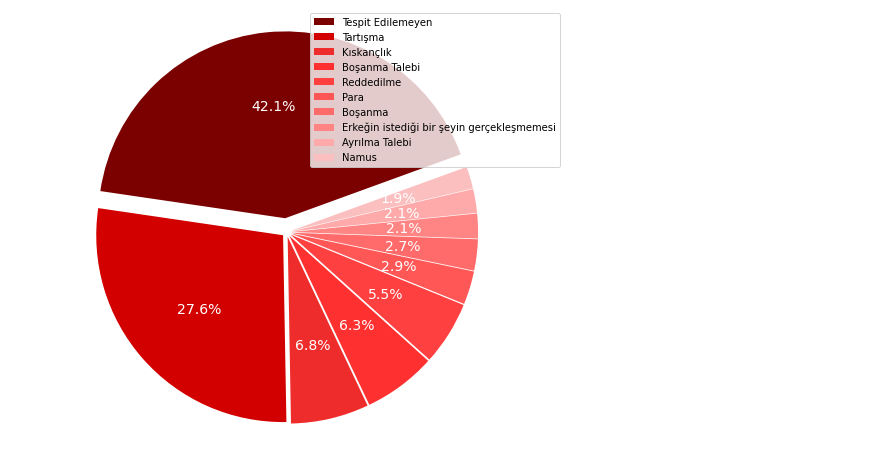

In [22]:

counts = data.why1.value_counts().head(10)
explode = (0.075, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025,0.025,0.025,0.025)
colors = ['#7a0100', '#d30000', '#ee2c2c', '#ff3030', '#ff4040', '#ff5656', '#ff6b6b',
          '#ff8484', '#ffaaaa', '#fcbfbf','#00FF80' ,]
index = ['Tespit Edilemeyen','Tartışma','Kıskançlık','Boşanma Talebi','Reddedilme','Para','Boşanma','Erkeğin istediği bir şeyin gerçekleşmemesi','Ayrılma Talebi','Namus']
counts.plot(kind='pie', fontsize=14, colors=colors, explode=explode,figsize = (10,8), autopct = "%1.1f%%" ,startangle = 20,textprops = dict(color = 'w') )
plt.axis('equal')
plt.ylabel('')
plt.legend(labels = index,loc = 'upper right')
plt.show()

<a id = '15'> </a>
## Kaynaklar

* https://www.hurriyet.com.tr
* https://www.sozcu.com.tr
* http://anitsayac.com

<a id = '16' > </a>
## Teammates

* Yağmur Sezen Demir
* Büşra Durak 
